In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Load the dataset
df = pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data1.csv')

# Display the first few rows of the dataset
#print(df.head())

# Check for missing values
#print(df.isnull().sum())

# Basic statistics
#print(df.describe())

In [35]:
# Convert Year and Month into a single datetime feature (optional but useful for time series)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

# Sort data by City and Date
df = df.sort_values(by=['City', 'Date'])

# Drop unnecessary columns (if any)
df = df.drop(columns=['Date'])  # Drop if not needed

# Check the preprocessed data
#print(df.head())

In [36]:
# Group data by City and Year, then calculate yearly average temperature
yearly_avg_temp = df.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()

# Add the 'YearsSince1743' feature for each city
yearly_avg_temp['YearsSince1744'] = yearly_avg_temp['Year'] - 1743

# Check the new grouped data
print(yearly_avg_temp.head())

     City  Year  AverageTemperature  YearsSince1744
0  Aachen  1744            8.470750               1
1  Aachen  1745            8.361583               2
2  Aachen  1746            8.489417               3
3  Aachen  1747            8.489417               4
4  Aachen  1748            8.489417               5


In [37]:
# Initialize lists to store splits for all cities
X_train_list, X_val_list, X_test_list = [], [], []
y_train_list, y_val_list, y_test_list = [], [], []

# Loop through each city and split the data
for city in yearly_avg_temp['City'].unique():
    city_data = yearly_avg_temp[yearly_avg_temp['City'] == city]
    X = city_data[['YearsSince1744']]  # Feature
    y = city_data['AverageTemperature']  # Target

    # Split the data for each city
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Append the splits to the lists
    X_train_list.append(X_train)
    X_val_list.append(X_val)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_val_list.append(y_val)
    y_test_list.append(y_test)

# Combine all city splits into single dataframes
X_train = pd.concat(X_train_list)
X_val = pd.concat(X_val_list)
X_test = pd.concat(X_test_list)
y_train = pd.concat(y_train_list)
y_val = pd.concat(y_val_list)
y_test = pd.concat(y_test_list)

# Check the shapes of the splits
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (15309, 1) (15309,)
Validation set: (3240, 1) (3240,)
Test set: (3321, 1) (3321,)


In [38]:
# Initialize the model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Check the model's coefficients
print("Model Intercept:", model.intercept_)
print("Model Coefficient:", model.coef_)

Model Intercept: 8.049255010747888
Model Coefficient: [0.00368494]


In [39]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.8401325186669587
Mean Squared Error (MSE): 1.2926850021487335
R-squared (R2): -0.05722505127631683


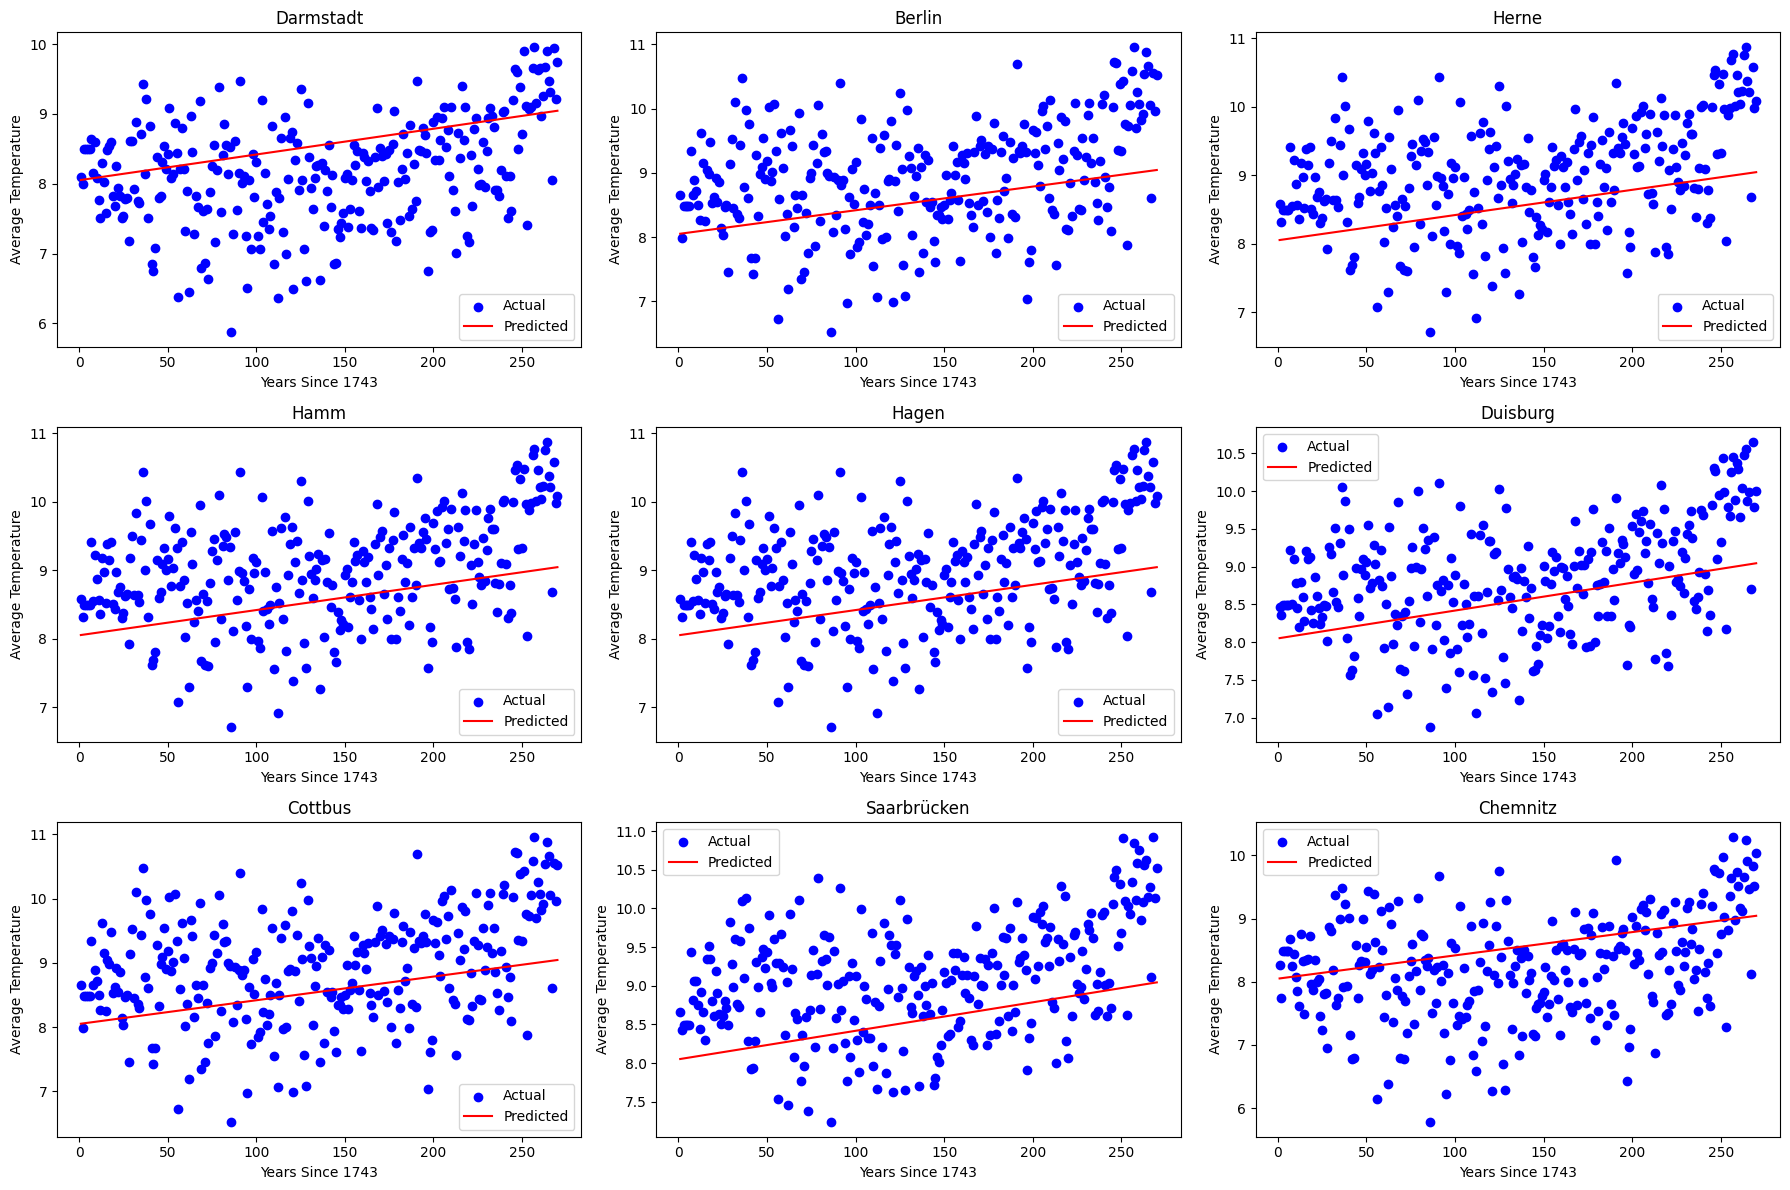

In [41]:
import random

# Select 9 random cities
random.seed(42)  # For reproducibility
selected_cities = random.sample(list(yearly_avg_temp['City'].unique()), 9)

# Create a 3x3 grid of subplots
plt.figure(figsize=(18, 12))
for i, city in enumerate(selected_cities, 1):
    plt.subplot(3, 3, i)
    
    # Filter data for the selected city
    city_data = yearly_avg_temp[yearly_avg_temp['City'] == city]
    X_city = city_data[['YearsSince1744']]
    y_city = city_data['AverageTemperature']
    y_city_pred = model.predict(X_city)
    
    # Plot actual vs predicted values
    plt.scatter(X_city, y_city, color='blue', label='Actual')
    plt.plot(X_city, y_city_pred, color='red', label='Predicted')
    plt.xlabel('Years Since 1743')
    plt.ylabel('Average Temperature')
    plt.title(f'{city}')
    plt.legend()

plt.tight_layout()
plt.show()

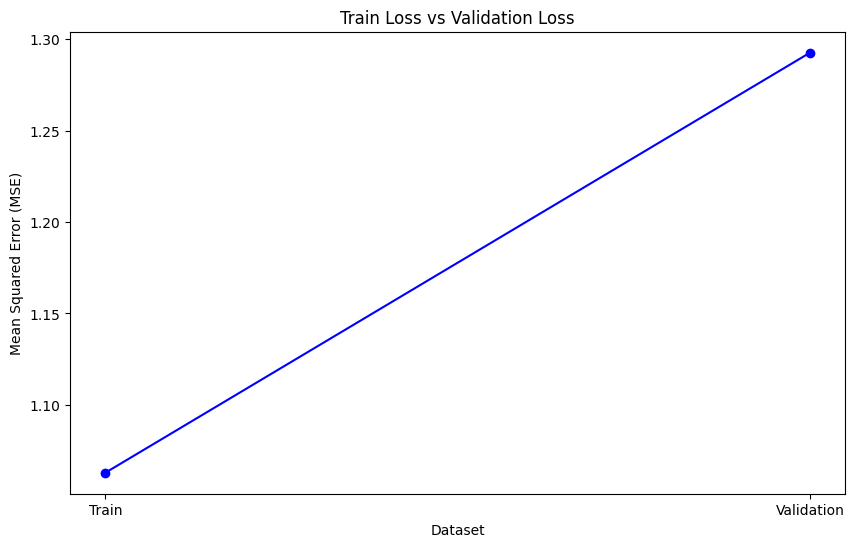

In [42]:
# Calculate training and validation predictions
y_train_pred = model.predict(X_train)

# Calculate training and validation errors
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_val, y_val_pred)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(['Train', 'Validation'], [train_loss, val_loss], marker='o', linestyle='-', color='b')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train Loss vs Validation Loss')
plt.show()

In [43]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print("Test Set Metrics:")
print("Mean Absolute Error (MAE):", mae_test)
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)

Test Set Metrics:
Mean Absolute Error (MAE): 0.7122118403106921
Mean Squared Error (MSE): 0.9697121943320797
R-squared (R2): 0.004943262781478053


In [44]:
# Interpret the coefficient
if model.coef_[0] > 0:
    print("The climate is warming over time across all cities.")
else:
    print("The climate is cooling over time across all cities.")

The climate is warming over time across all cities.
